In [4]:
library(INLA)
n = 100; a = 1; b = 1; tau = 100
z = rnorm(n)
eta = a + b*z

scale = exp(rnorm(n))
prec = scale*tau
y = rnorm(n, mean = eta, sd = 1/sqrt(prec))


data = list(y=y, z=z)
formula = y ~ 1+z
result = inla(formula, family = "gaussian", data = data)

summary(result)

Warning message in .recacheSubclasses(def@className, def, env):
"undefined subclass "numericVector" of class "Mnumeric"; definition not updated"



Call:
   "inla(formula = formula, family = \"gaussian\", data = data)" 
Time used:
    Pre = 0.345, Running = 0.172, Post = 0.0312, Total = 0.548 
Fixed effects:
             mean    sd 0.025quant 0.5quant 0.975quant  mode kld
(Intercept) 0.984 0.013      0.957    0.984       1.01 0.984   0
z           0.984 0.013      0.958    0.984       1.01 0.984   0

Model hyperparameters:
                                         mean   sd 0.025quant 0.5quant
Precision for the Gaussian observations 57.63 8.15      42.77    57.25
                                        0.975quant  mode
Precision for the Gaussian observations      74.68 56.48

Expected number of effective parameters(stdev): 2.04(0.005)
Number of equivalent replicates : 49.15 

Marginal log-Likelihood:  42.70 

In [1]:
library(sp)
library(sf)
library(INLA)

Warning message:
"replacing previous import 'lifecycle::last_warnings' by 'rlang::last_warnings' when loading 'tibble'"
Warning message:
"replacing previous import 'ellipsis::check_dots_unnamed' by 'rlang::check_dots_unnamed' when loading 'tibble'"
Warning message:
"replacing previous import 'ellipsis::check_dots_used' by 'rlang::check_dots_used' when loading 'tibble'"
Warning message:
"replacing previous import 'ellipsis::check_dots_empty' by 'rlang::check_dots_empty' when loading 'tibble'"
Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1

Warning message:
"package 'INLA' was built under R version 4.0.4"
Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 4.0.5"
Loading required package: foreach

Warning message:
"package 'foreach' was built under R version 4.0.5"
Loading required package: parallel

This is INLA_21.02.23 built 2021-02-22 2

In [2]:
# Checking if these are correct

est_data <- read.csv('final_clean_grouped_est.csv')
pred_data <- read.csv('final_clean_grouped_pred.csv')

In [4]:
#names(pred_data) <- c('Dessem_id', "Province","x","y",'Commitment Counts','closest_city_dist','closest_PC_dist',
#                      'Population','number_of_tiles','conn_type','time')
pred_data[pred_data['PRNAME'] == 'Ontario',]

,DAUID,PRNAME,x,y,Y,distance_to_closest_city,closest_PC_dist,DA_POP,total,conn_type
,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
9142,35010180,Ontario,7561118,1169124,6,92237.48,15543.83,1000,10,fixed
9143,35010181,Ontario,7560271,1169709,4,91277.78,23639.18,365,5,fixed
9144,35010183,Ontario,7559894,1169423,1,90975.14,15732.34,740,1,fixed
9145,35010184,Ontario,7560011,1169000,1,91186.80,15730.44,410,1,fixed
9146,35010185,Ontario,7559664,1168600,2,90944.53,15290.91,845,3,fixed
9147,35010186,Ontario,7559201,1168624,2,90488.88,14850.15,620,3,fixed
9148,35010187,Ontario,7559667,1167766,3,91149.22,15095.54,530,8,['fixed' 'mobile']
9149,35010189,Ontario,7560245,1168154,1,91615.00,15743.21,375,1,fixed
9150,35010190,Ontario,7560786,1167848,1,92214.45,16206.44,410,1,fixed


In [5]:
est_data

DAUID,PRNAME,x,y,Y,distance_to_closest_city,closest_PC_dist,DA_POP,total,conn_type
<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
10010165,Newfoundland and Labrador / Terre-Neuve-et-Labrador,8978154,2146515,3,807823.6,3345.196,505,3,fixed
10010168,Newfoundland and Labrador / Terre-Neuve-et-Labrador,8978528,2146948,1,808389.3,3713.691,520,1,fixed
10010170,Newfoundland and Labrador / Terre-Neuve-et-Labrador,8978289,2147287,1,808429.8,3511.169,400,1,fixed
10010171,Newfoundland and Labrador / Terre-Neuve-et-Labrador,8977949,2147047,1,808015.8,3143.633,485,1,fixed
10010173,Newfoundland and Labrador / Terre-Neuve-et-Labrador,8978320,2148324,2,809132.5,3840.950,885,2,fixed
10010174,Newfoundland and Labrador / Terre-Neuve-et-Labrador,8978389,2147866,1,808884.6,3741.792,885,1,fixed
10010175,Newfoundland and Labrador / Terre-Neuve-et-Labrador,8978739,2147732,4,809061.1,4047.457,965,4,fixed
10010176,Newfoundland and Labrador / Terre-Neuve-et-Labrador,8979069,2148346,1,809712.7,4541.209,435,1,fixed
10010180,Newfoundland and Labrador / Terre-Neuve-et-Labrador,8979892,2146460,5,809103.2,7922.369,540,7,fixed


In [2]:
args(inla.mesh.2d)

function (loc = NULL, loc.domain = NULL, offset = NULL, n = NULL, 
    boundary = NULL, interior = NULL, max.edge = NULL, min.angle = NULL, 
    cutoff = 1e-12, max.n.strict = NULL, max.n = NULL, plot.delay = NULL, 
    crs = NULL) 
NULL

In [107]:
sf_data <- st_read("final_clean_grouped_est.csv", options=c("X_POSSIBLE_NAMES=x","Y_POSSIBLE_NAMES=y"))
sf_data_pred <- st_read("final_clean_grouped_pred.csv", options=c("X_POSSIBLE_NAMES=x","Y_POSSIBLE_NAMES=y"))

options:        X_POSSIBLE_NAMES=x Y_POSSIBLE_NAMES=y 
Reading layer `final_clean_grouped_est' from data source `C:\Users\Christian\Dropbox\My PC (DESKTOP-SSBH787)\Documents\Waterloo_Grad_School\SCC\final_clean_grouped_est.csv' using driver `CSV'
Simple feature collection with 31492 features and 10 fields
geometry type:  POINT
dimension:      XY
bbox:           xmin: 3827795 ymin: 690863.6 xmax: 8983427 ymax: 4069898
CRS:            NA
options:        X_POSSIBLE_NAMES=x Y_POSSIBLE_NAMES=y 
Reading layer `final_clean_grouped_pred' from data source `C:\Users\Christian\Dropbox\My PC (DESKTOP-SSBH787)\Documents\Waterloo_Grad_School\SCC\final_clean_grouped_pred.csv' using driver `CSV'
Simple feature collection with 31413 features and 10 fields
geometry type:  POINT
dimension:      XY
bbox:           xmin: 3827744 ymin: 690863.6 xmax: 8983487 ymax: 4069965
CRS:            NA


In [4]:
unique(sf_data$PRNAME)

[1] "Newfoundland and Labrador / Terre-Neuve-et-Labrador"
 [2] "Prince Edward Island / Île-du-Prince-Édouard"       
 [3] "Nova Scotia / Nouvelle-Écosse"                      
 [4] "New Brunswick / Nouveau-Brunswick"                  
 [5] "Quebec / Québec"                                    
 [6] "Ontario"                                            
 [7] "Manitoba"                                           
 [8] "Saskatchewan"                                       
 [9] "Alberta"                                            
[10] "British Columbia / Colombie-Britannique"            
[11] "Yukon"                                              
[12] "Northwest Territories / Territoires du Nord-Ouest"  
[13] "Nunavut"

In [108]:
# Subsetting for nova scotia data:
sf_data <- sf_data[sf_data$PRNAME == 'Ontario',]
sf_data_pred <- sf_data_pred[sf_data_pred$PRNAME == 'Ontario',]

In [109]:
sf_data

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(

,DAUID,PRNAME,x,y,Y,distance_to_closest_city,closest_PC_dist,DA_POP,total,conn_type,geometry
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<POINT>
9177,35010180,Ontario,7561101,1169188,8,92206.44911837694,15758.801387380814,1000.0,12.0,fixed,POINT (7561101 1169188)
9178,35010181,Ontario,7560289,1169646,3,91309.13713567199,16175.846309166038,365.0,4.0,fixed,POINT (7560289 1169646)
9179,35010183,Ontario,7559894,1169423,1,90975.14104159371,15732.335182549938,740.0,2.0,['fixed' 'mobile'],POINT (7559894 1169423)
9180,35010184,Ontario,7560011,1169000,1,91186.79568555836,15730.444364348055,410.0,1.0,fixed,POINT (7560011 1169000)
9181,35010185,Ontario,7559645,1168671,2,90908.83383285711,15290.704373298653,845.0,2.0,fixed,POINT (7559645 1168671)
9182,35010186,Ontario,7559240,1168483,2,90560.55552591209,14850.568574297844,620.0,3.0,fixed,POINT (7559240 1168483)
9183,35010187,Ontario,7559721,1167735,4,91209.19636637664,15141.949452754998,530.0,5.0,fixed,POINT (7559721 1167735)
9184,35010189,Ontario,7560245,1168154,1,91614.99964831854,15743.210648580893,375.0,2.0,['fixed' 'mobile'],POINT (7560245 1168154)
9185,35010190,Ontario,7560786,1167848,1,92214.45186932667,16206.436932951903,410.0,1.0,fixed,POINT (7560786 1167848)


In [110]:
max.edge = diff(range(unique(st_coordinates(sf_data)[,1])))/(5)

In [111]:
max.edge = diff(range(unique(st_coordinates(sf_data)[,1])))/(15)
mesh1 = inla.mesh.2d(loc=unique(st_coordinates(sf_data)),
                    max.edge = c(1,2)*max.edge
                    )


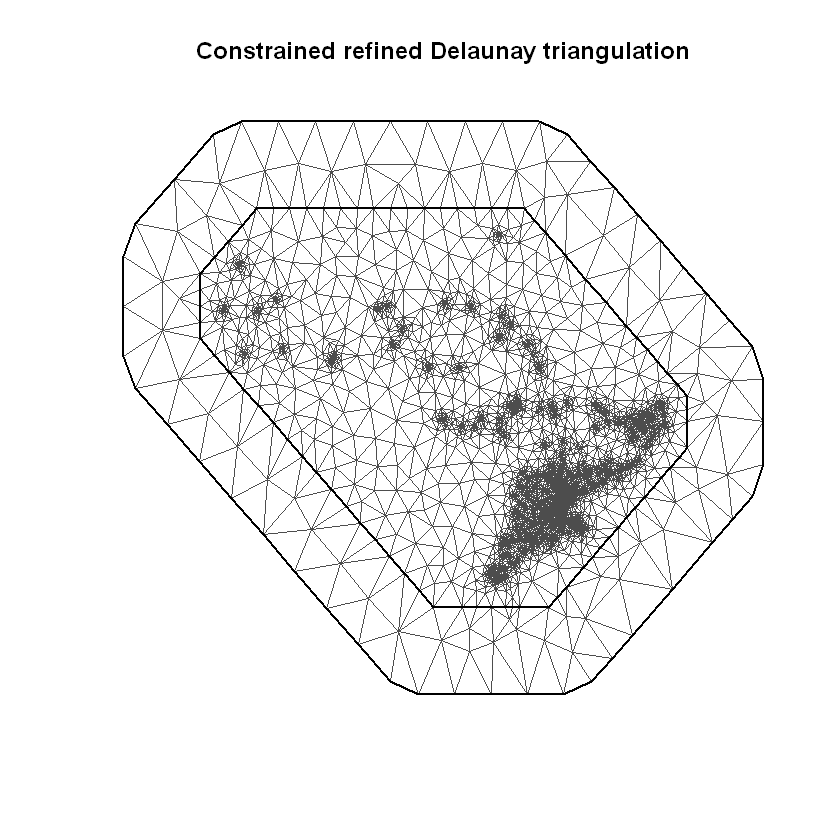

In [112]:
plot(mesh1)

In [113]:
bound.outer = diff(range(unique(st_coordinates(sf_data))[,1]))/4
domain <- inla.nonconvex.hull(as.matrix(unique(st_coordinates(sf_data))),
                              concave = -.07,convex = -0.05, resolution=c(100,100))
mesh1 = inla.mesh.2d(loc=unique(st_coordinates(sf_data)),
                    boundary = domain,
                    max.edge = c(1,2)*max.edge,
                    offset=c(max.edge, bound.outer)
                    )

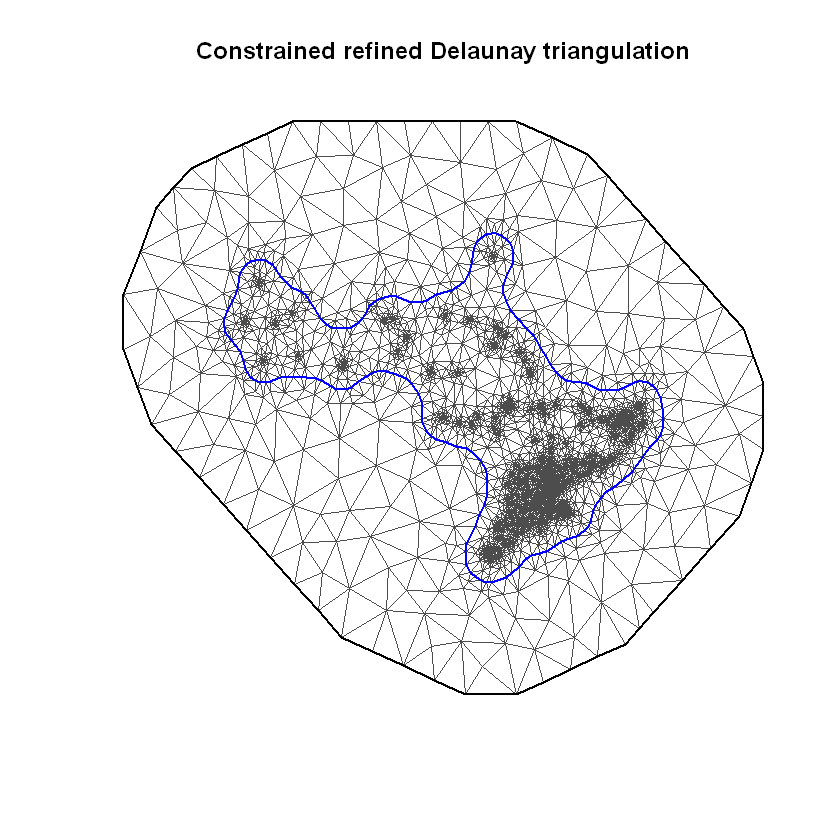

In [114]:
plot(mesh1)

In [ ]:
names(sf_data_pred)

In [49]:
sf_data

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(

,DAUID,PRNAME,x,y,Y,distance_to_closest_city,closest_PC_dist,DA_POP,total,conn_type,time,geometry
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<POINT>
6061,12010031,Nova Scotia / Nouvelle-Écosse,8323930,1290539,0,174231.97385269293,66287.09681704515,420.0,1.0,fixed,3.0,POINT (8323930 1290539)
6062,12010031,Nova Scotia / Nouvelle-Écosse,8323930,1290539,1,174231.97385269293,66287.09681704515,420.0,1.0,fixed,9.0,POINT (8323930 1290539)
6063,12010032,Nova Scotia / Nouvelle-Écosse,8325102,1290688,1,173512.91265902095,45229.9110530292,455.0,4.0,['fixed' 'mobile'],1.0,POINT (8325102 1290688)
6064,12010032,Nova Scotia / Nouvelle-Écosse,8325148,1290585,1,173579.23178955656,32532.646790269897,455.0,2.0,fixed,2.0,POINT (8325148 1290585)
6065,12010032,Nova Scotia / Nouvelle-Écosse,8325217,1290615,2,173518.2125849649,23963.954594424093,455.0,3.0,fixed,3.0,POINT (8325217 1290615)
6066,12010032,Nova Scotia / Nouvelle-Écosse,8325148,1290585,1,173579.23178955656,32532.646790269897,455.0,2.0,fixed,4.0,POINT (8325148 1290585)
6067,12010032,Nova Scotia / Nouvelle-Écosse,8325263,1290883,1,173263.53591471037,32221.098728251083,455.0,2.0,fixed,5.0,POINT (8325263 1290883)
6068,12010032,Nova Scotia / Nouvelle-Écosse,8325056,1290791,2,173446.59352848533,57927.175315788496,455.0,2.0,fixed,6.0,POINT (8325056 1290791)
6069,12010032,Nova Scotia / Nouvelle-Écosse,8325156,1290753,2,173429.7870775841,40893.64027810316,455.0,3.0,fixed,7.0,POINT (8325156 1290753)


In [50]:
sf_data_pred

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(

,DAUID,PRNAME,x,y,Y,distance_to_closest_city,closest_PC_dist,DA_POP,total,conn_type,time,geometry
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<POINT>
558,12010032,Nova Scotia / Nouvelle-Écosse,8325079,1290554,2,173640.25099414823,41101.3389861157,455.0,3.0,mobile,12.0,POINT (8325079 1290554)
559,12010033,Nova Scotia / Nouvelle-Écosse,8325124,1290081,1,174027.8271670732,58479.8024850957,410.0,1.0,fixed,12.0,POINT (8325124 1290081)
560,12010034,Nova Scotia / Nouvelle-Écosse,8325836,1290150,1,173613.33230556193,58031.50953051291,460.0,2.0,fixed,12.0,POINT (8325836 1290150)
561,12020050,Nova Scotia / Nouvelle-Écosse,8260798,1275800,0,158171.0068405764,2872.9705276389354,590.0,1.0,fixed,12.0,POINT (8260798 1275800)
562,12020051,Nova Scotia / Nouvelle-Écosse,8261152,1274973,0,159071.18133485684,61502.76783819031,585.0,1.0,fixed,12.0,POINT (8261152 1274973)
563,12020052,Nova Scotia / Nouvelle-Écosse,8261705,1274066,3,160119.18417333087,8471.215047654105,495.0,3.0,fixed,12.0,POINT (8261705 1274066)
564,12020053,Nova Scotia / Nouvelle-Écosse,8261526,1273336,3,160727.51511991114,331.79848909714974,585.0,3.0,fixed,12.0,POINT (8261526 1273336)
565,12020054,Nova Scotia / Nouvelle-Écosse,8262182,1273258,4,161047.82580430078,294.5598356905393,580.0,5.0,fixed,12.0,POINT (8262182 1273258)
566,12020055,Nova Scotia / Nouvelle-Écosse,8262173,1272593,4,161660.97800163052,481.96801715850427,545.0,4.0,fixed,12.0,POINT (8262173 1272593)


In [115]:
# Converting character attributes to factors in the dataframe for prediction. (last bit of cleaning)
sf_data$conn_type <- factor(sf_data$conn_type)
sf_data_pred$conn_type <- factor(sf_data_pred$conn_type)

#converting everything to numeric again:
sf_data$DA_POP <- as.numeric(sf_data$DA_POP)
sf_data_pred$DA_POP <- as.numeric(sf_data_pred$DA_POP)

sf_data$distance_to_closest_city <- as.numeric(sf_data$distance_to_closest_city)
sf_data_pred$distance_to_closest_city <- as.numeric(sf_data_pred$distance_to_closest_city)

sf_data$closest_PC_dist<- as.numeric(sf_data$closest_PC_dist)
sf_data_pred$closest_PC_dist<- as.numeric(sf_data_pred$closest_PC_dist)

sf_data$Y<- as.numeric(sf_data$Y)
sf_data_pred$Y<- as.numeric(sf_data_pred$Y)

#sf_data$time<- as.numeric(sf_data$time)
#sf_data_pred$time<- as.numeric(sf_data_pred$time)

sf_data$total<- as.numeric(sf_data$total)
sf_data_pred$total<- as.numeric(sf_data_pred$total)

In [116]:
# Initializing co-ordinates that I would estimate and predict on
coo <- st_coordinates(sf_data)
coop <- st_coordinates(sf_data_pred)
# Constructing observation matrices for prediction and estimation
spde <- inla.spde2.matern(mesh=mesh1,alpha = 2)
field.indices = inla.spde.make.index("field", n.spde=mesh1$n)
indexs <- inla.spde.make.index("s", spde$n.spde)
A <- inla.spde.make.A(mesh = mesh1, loc = coo)
Ap <- inla.spde.make.A(mesh = mesh1, loc = coop)

In [117]:
# stack for estimation stk.e
stk.e <- inla.stack(
  tag = "est",
  data = list(Y = sf_data$Y, numtrials = sf_data$total),
  A = list(1, A),
  effects = list(data.frame(b0 = 1,conn_type = sf_data$conn_type,pop = sf_data$DA_POP,
                            IXP_dist = sf_data$distance_to_closest_city,PC_dist = sf_data$closest_PC_dist), s = indexs)
)

# stack for prediction stk.p
stk.p <- inla.stack(
  tag = "pred",
  data = list(Y = NA, numtrials = NA),
  A = list(1,Ap),
  effects = list(data.frame(b0 = 1,conn_type = sf_data_pred$conn_type,pop = sf_data_pred$DA_POP,
                           IXP_dist = sf_data_pred$distance_to_closest_city,
                            PC_dist = sf_data_pred$closest_PC_dist), s = indexs)
)

# stk.full has stk.e and stk.p
stk.full <- inla.stack(stk.e, stk.p)
#stk.full <- stk.e

In [48]:
sf_data

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(

,DAUID,PRNAME,x,y,Y,distance_to_closest_city,closest_PC_dist,DA_POP,total,conn_type,geometry
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<POINT>
560,12010032,Nova Scotia / Nouvelle-Écosse,8325206,1290734,2,173421.38,32376.8728,455,4,fixed,POINT (8325206 1290734)
561,12010033,Nova Scotia / Nouvelle-Écosse,8325124,1290081,1,174027.83,58479.8025,410,1,fixed,POINT (8325124 1290081)
562,12010034,Nova Scotia / Nouvelle-Écosse,8325737,1290188,2,173629.63,58053.7951,460,3,fixed,POINT (8325737 1290188)
563,12020050,Nova Scotia / Nouvelle-Écosse,8260798,1275800,0,158171.01,2872.9705,590,1,fixed,POINT (8260798 1275800)
564,12020051,Nova Scotia / Nouvelle-Écosse,8261034,1275248,2,158771.11,31616.3798,585,3,fixed,POINT (8261034 1275248)
565,12020052,Nova Scotia / Nouvelle-Écosse,8261705,1274066,3,160119.18,8471.2150,495,3,fixed,POINT (8261705 1274066)
566,12020053,Nova Scotia / Nouvelle-Écosse,8261610,1273332,3,160763.64,291.6842,585,4,fixed,POINT (8261610 1273332)
567,12020054,Nova Scotia / Nouvelle-Écosse,8262238,1273397,2,160941.09,424.7537,580,6,fixed,POINT (8262238 1273397)
568,12020055,Nova Scotia / Nouvelle-Écosse,8262217,1272489,3,161773.57,9536.5961,545,4,fixed,POINT (8262217 1272489)


In [ ]:
# Defining formula and fitting model
formula <- Y ~ -1+ b0+ IXP_dist+ f(s, model = spde)

res <- inla(formula,
  family = "binomial", Ntrials = numtrials,
  control.family = list(link = "logit"),
  data = inla.stack.data(stk.full),
  control.predictor = list(
    compute = TRUE, link = 1,
    A = inla.stack.A(stk.full)
  )
)

In [ ]:
summary(res)

In [95]:
posterior_samples <-inla.posterior.sample(n = 2,res,use.improved.mean = FALSE)

In [99]:
posterior_samples[[1]]$latent

,sample:1
APredictor:1,1.18729650
APredictor:2,1.26159012
APredictor:3,1.23250160
APredictor:4,1.11208428
APredictor:5,1.05361654
APredictor:6,1.17917612
APredictor:7,1.26622235
APredictor:8,1.12487597
APredictor:9,1.30529718
APredictor:10,1.03165760


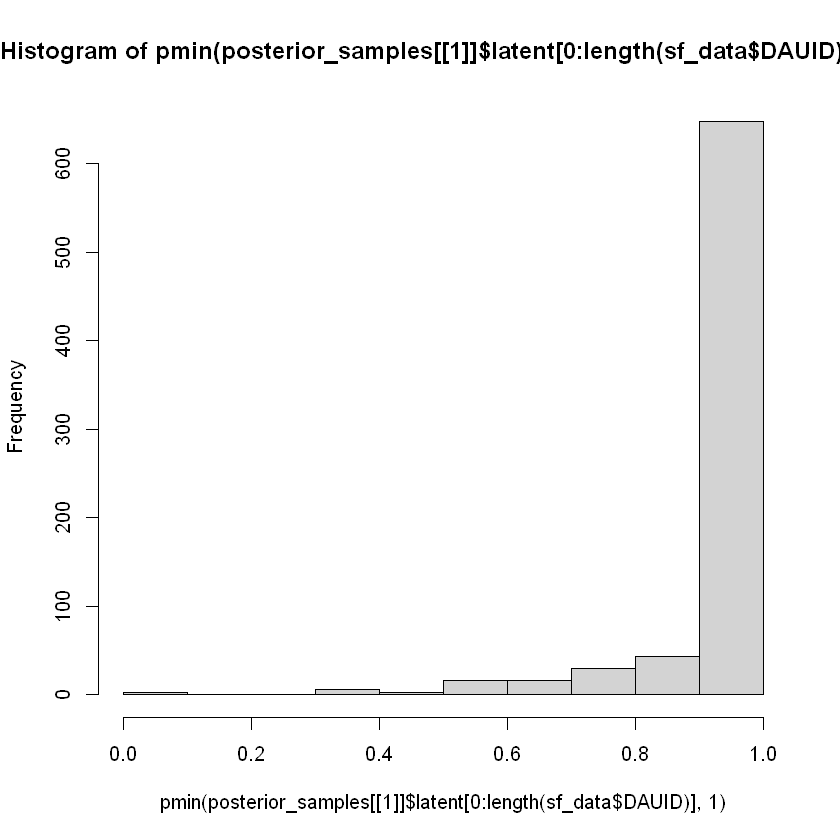

In [83]:
hist(pmin(posterior_samples[[1]]$latent[0:length(sf_data$DAUID)],1))

In [ ]:
index <- inla.stack.index(stack = stk.full, tag = "pred")$data
prev_mean <- res$summary.fitted.values[index, "mean"]
prev_ll <- res$summary.fitted.values[index, "0.025quant"]
prev_ul <- res$summary.fitted.values[index, "0.975quant"]
prev_mode <- res$summary.fitted.values[index, "mode"]

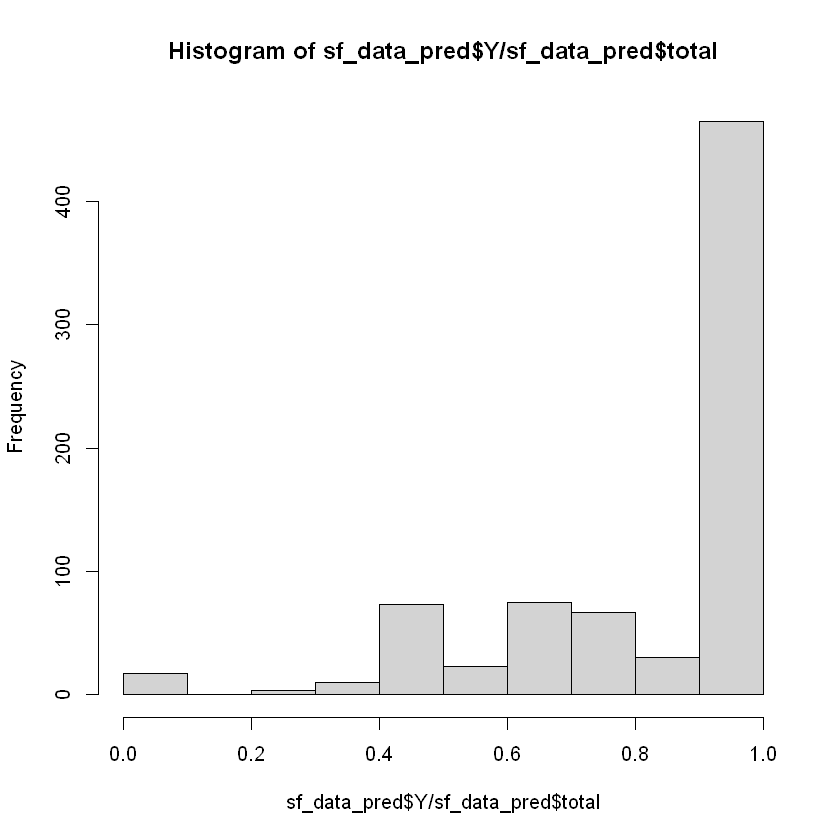

In [55]:
hist(sf_data_pred$Y/sf_data_pred$total)

In [100]:
max(prev_mean)

[1] 0.8748357

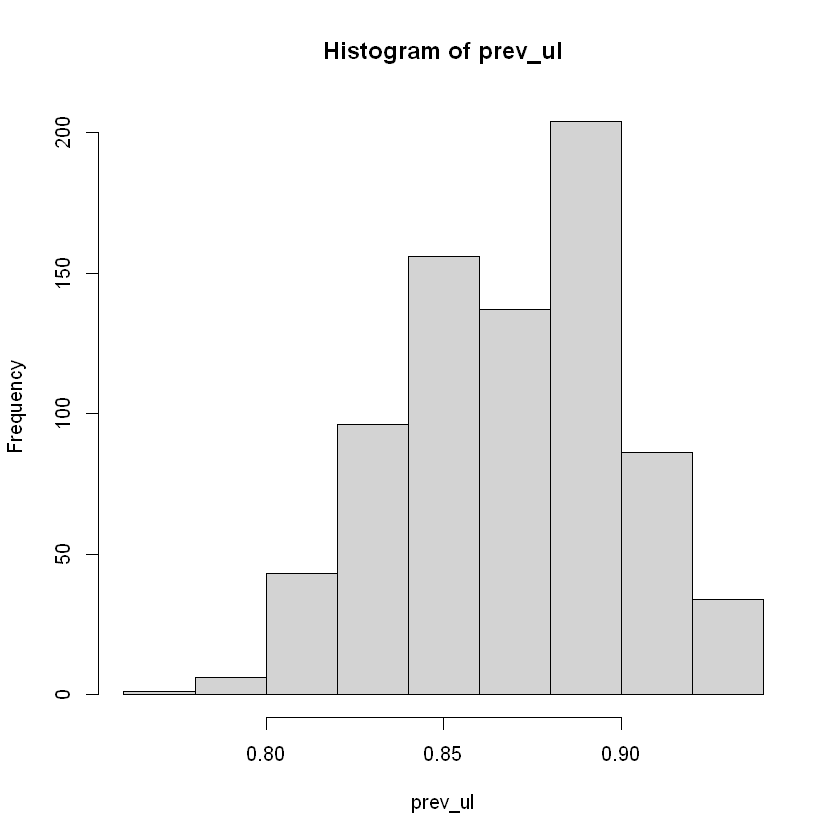

In [102]:
hist(prev_ul)

In [ ]:
Scotia_predictions<- data.frame(cbind(sf_data_pred$x,sf_data_pred$y, prev_mean, prev_ll,prev_ul,prev_mode))

In [103]:
nova_without_time <- read.csv("Nova Scotia_pred.csv")

In [ ]:
hist(nova_without_time$)

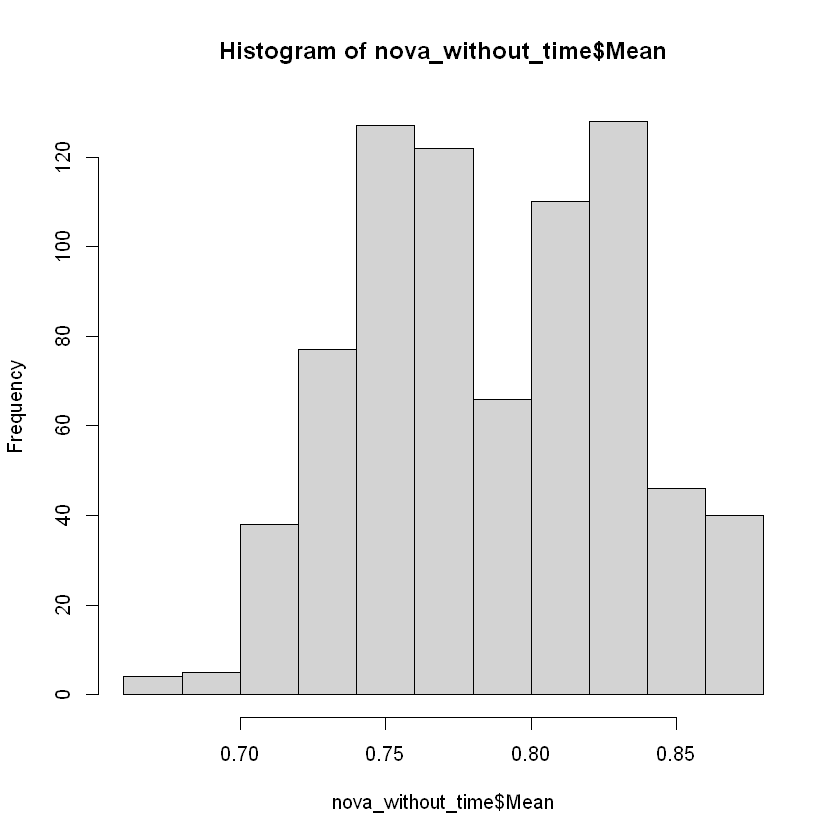

In [70]:
hist(nova_without_time$Mean)

In [ ]:
write.csv(Scotia_predictions,"Ontario_preds.csv")

In [46]:
colnames(Ontario_predictions) = c('x','y','Mean','lower_quant','upper_quant','Mode')

In [49]:
write.csv(Ontario_predictions,'Ontario_pred.csv')

In [50]:
Ontario_predictions

x,y,Mean,lower_quant,upper_quant,Mode
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7561118,1169124,0.7434962,0.6203799,0.8430884,0.7564405
7560271,1169709,0.7527228,0.6387714,0.8453351,0.7643920
7559894,1169423,0.7562568,0.6505157,0.8430920,0.7665424
7560011,1169000,0.7541896,0.6528105,0.8382587,0.7636002
7559664,1168600,0.7558185,0.6608945,0.8353086,0.7641718
7559201,1168624,0.7588731,0.6696158,0.8341666,0.7663981
7559667,1167766,0.7478232,0.6504722,0.8296515,0.7562498
7560245,1168154,0.7471725,0.6428452,0.8338774,0.7567712
7560786,1167848,0.7401015,0.6222474,0.8366098,0.7517997


In [26]:
sf_data_pred

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(

,DAUID,PRNAME,x,y,Y,distance_to_closest_city,closest_PC_dist,DA_POP,total,conn_type,geometry
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<POINT>
9142,35010180,Ontario,7561118,1169124,6,92237.48,15543.83,1000,10.0,fixed,POINT (7561118 1169124)
9143,35010181,Ontario,7560271,1169709,4,91277.78,23639.18,365,5.0,fixed,POINT (7560271 1169709)
9144,35010183,Ontario,7559894,1169423,1,90975.14,15732.34,740,1.0,fixed,POINT (7559894 1169423)
9145,35010184,Ontario,7560011,1169000,1,91186.80,15730.44,410,1.0,fixed,POINT (7560011 1169000)
9146,35010185,Ontario,7559664,1168600,2,90944.53,15290.91,845,3.0,fixed,POINT (7559664 1168600)
9147,35010186,Ontario,7559201,1168624,2,90488.88,14850.15,620,3.0,fixed,POINT (7559201 1168624)
9148,35010187,Ontario,7559667,1167766,3,91149.22,15095.54,530,8.0,['fixed' 'mobile'],POINT (7559667 1167766)
9149,35010189,Ontario,7560245,1168154,1,91615.00,15743.21,375,1.0,fixed,POINT (7560245 1168154)
9150,35010190,Ontario,7560786,1167848,1,92214.45,16206.44,410,1.0,fixed,POINT (7560786 1167848)


In [51]:
dataframe

x,y,Mean,lower_quant,upper_quant
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8325079,1290554,0.7225113,0.5869644,0.8268033
8325124,1290081,0.7243181,0.5889632,0.8285721
8325836,1290150,0.7234682,0.5850672,0.8300744
8260798,1275800,0.7236257,0.5782686,0.8358688
8261152,1274973,0.7255392,0.5983394,0.8259278
8261705,1274066,0.7253390,0.5967218,0.8277492
8261526,1273336,0.7244322,0.6017711,0.8225550
8262182,1273258,0.7217645,0.5995756,0.8191202
8262173,1272593,0.7291929,0.6088391,0.8259016
